In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax

In [478]:
# train_csv = pd.read_csv("../experiments/ISIC_22624/ISIC_test_dist22624.csv", header = None)



train_csv = pd.read_csv('../experiments/stargan_identity.class6/retest_distances500.csv', header= None)
train_csv = train_csv.rename(columns={0:"Truth", 1:"BLA", 2:"EBO", 3: "LYT", 4:"NGS", 5:"PLM", 6:"PMO"})


# train_csv
# train_csv = train_csv.rename(columns={0:"Truth", 1:"BEN_SING", 2:"BEN", 3: "MAL"})



In [479]:
#class_predictions.idxmax(axis=1)

Pred = np.argmax(retest_svm500, axis =1 )

In [480]:
retest_svm500 = np.load('../experiments/stargan_identity.class6/retest_svm500_3424.npy')

class_predictions = pd.DataFrame(retest_svm500)
class_predictions = class_predictions.rename(columns={0:"BLA", 1:"EBO", 2: "LYT", 3:"NGS", 4:"PLM", 5:"PMO"})

train_csv['Pred_Class'] = class_predictions.idxmax(axis=1)
train_csv['Pred'] = Pred
train_csv['Proba'] = class_predictions.max(axis = 1)


In [491]:
softmax(retest_svm500)[0][0]

3.520977603329089e-06

In [482]:
mask = (class_predictions.max(axis=1) < 0.4) & (class_predictions.max(axis=1) > 0.3)
# mask = (class_predictions.max(axis=1) > 0.8)

train_csv = train_csv[mask]

In [483]:
train_csv = train_csv[train_csv.Truth == train_csv.Pred]

In [436]:
masked_prediction = class_predictions[mask]

df = masked_prediction[train_csv.Truth != train_csv.Pred]
df.rank(axis=1, ascending=False)

,BLA,EBO,LYT,NGS,PLM,PMO
549,6.0,1.0,2.0,4.0,3.0,5.0
872,6.0,1.0,2.0,5.0,3.0,4.0
994,6.0,1.0,2.0,4.0,3.0,5.0
1616,6.0,1.0,2.0,4.0,3.0,5.0
1648,6.0,1.0,2.0,4.0,3.0,5.0
...,...,...,...,...,...,...
84410,1.0,6.0,3.0,5.0,4.0,2.0
84563,1.0,6.0,3.0,5.0,4.0,2.0
84578,1.0,5.0,2.0,6.0,4.0,3.0
84616,1.0,5.0,2.0,6.0,4.0,3.0


In [467]:
train_csv

,Truth,BLA,EBO,LYT,NGS,PLM,PMO,Pred_Class,Pred,Proba
1,0,1622.9788,8188.343,12876.5680,21882.1900,2277.7966,2456.1907,BLA,0,0.810560
5,0,1300.1941,10151.920,1267.1344,3352.8496,3993.6360,8390.7650,BLA,0,0.875152
10,0,1497.0598,14206.031,6938.4463,16608.6660,8014.7930,6557.2505,BLA,0,0.860444
13,0,1510.1852,10431.472,2754.3330,9739.1250,4187.7695,2872.3457,BLA,0,0.842486
14,0,1626.2844,9088.562,10764.0180,16365.2790,3258.6902,6203.5280,BLA,0,0.814711
...,...,...,...,...,...,...,...,...,...,...
83168,5,8609.9330,21323.078,23036.1600,20835.3160,10027.8190,1839.5375,PMO,5,0.847736
83758,5,5940.5860,19263.810,18701.6970,26662.1330,6738.2190,1758.6616,PMO,5,0.840231
83767,5,8316.8460,19749.658,26808.7660,31065.7970,11610.4560,2802.2148,PMO,5,0.804495
83864,5,6160.3574,20021.414,20279.1760,14053.8930,9785.4620,2568.6948,PMO,5,0.860411


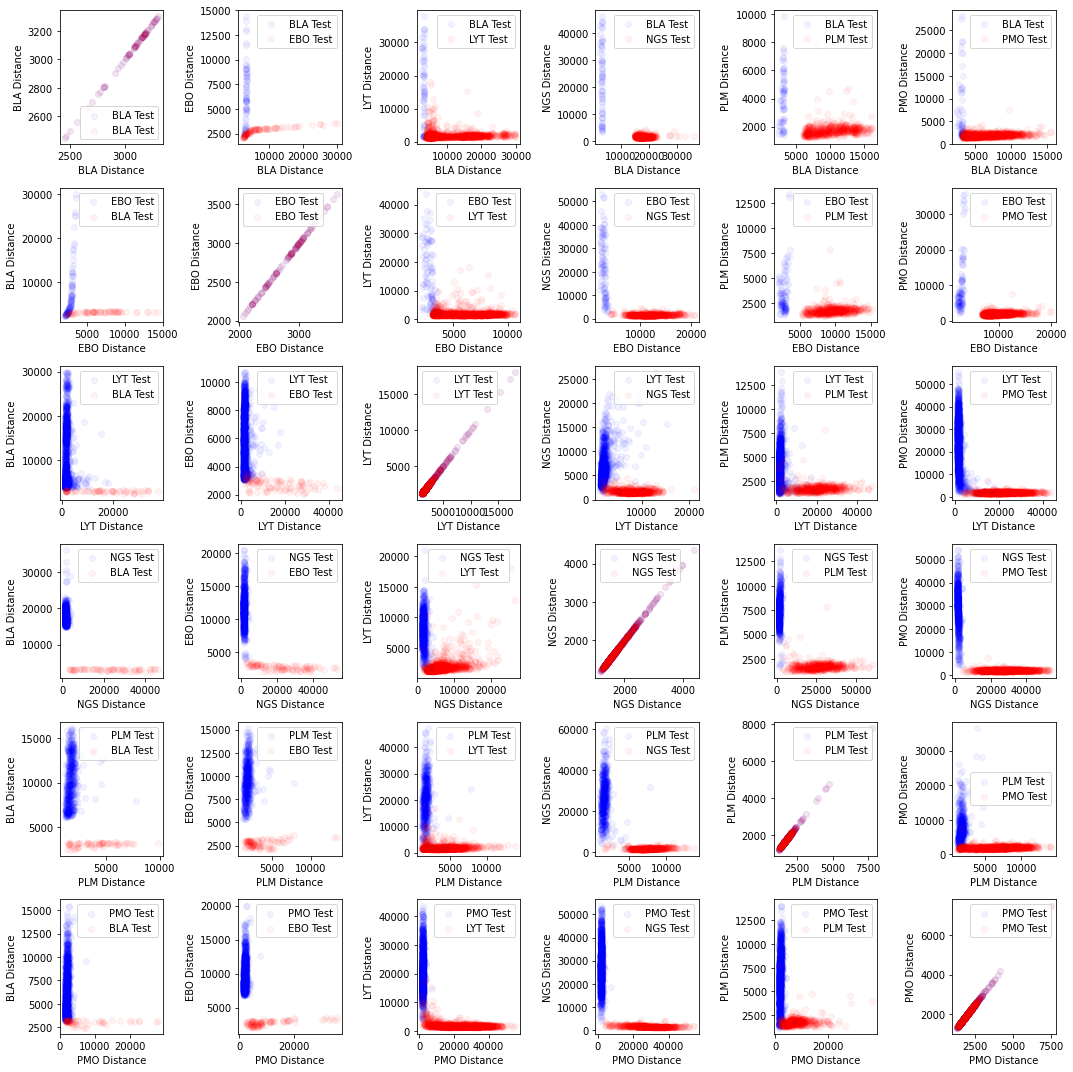

In [484]:
BLA_val = train_csv[train_csv['Truth'] == 0]
EBO_val = train_csv[train_csv['Truth'] == 1]
LYT_val = train_csv[train_csv['Truth'] == 2]
NGS_val = train_csv[train_csv['Truth'] == 3]
PLM_val = train_csv[train_csv['Truth'] == 4]
PMO_val = train_csv[train_csv['Truth'] == 5]
frames = [BLA_val, EBO_val, LYT_val, NGS_val, PLM_val, PMO_val]
titles = ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']

# Create a figure and axes for the plots
fig, axs = plt.subplots(nrows=len(titles), ncols=len(titles), figsize=(15, 15))

# Iterate over each combination of frames
for i, frame1 in enumerate(frames):
    for j, frame2 in enumerate(frames):
        # Create scatter plot for the combination of frame1 and frame2
        axs[i, j].scatter(frame1[titles[i]], frame1[titles[j]], alpha=0.05, c='blue', label=titles[i] + ' Test')
        axs[i, j].scatter(frame2[titles[i]], frame2[titles[j]], alpha=0.05, c='red', label=titles[j] + ' Test')
        axs[i, j].set_xlabel(titles[i] + ' Distance')
        axs[i, j].set_ylabel(titles[j] + ' Distance')
        axs[i, j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<ipython-input-469-d7b3b04e1544>:21: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs[i, j].legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is 

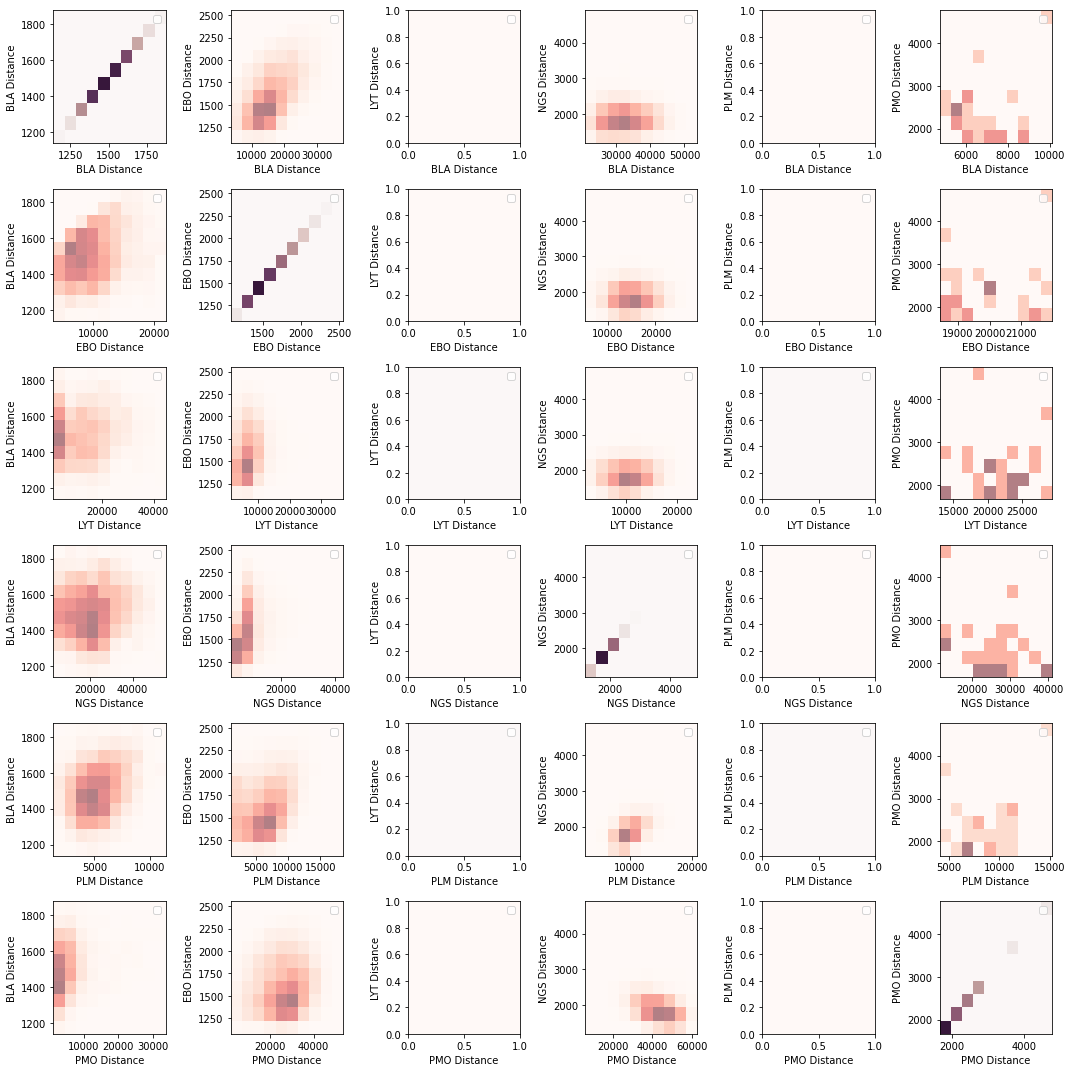

In [469]:
BLA_val = train_csv[train_csv['Truth'] == 0]
EBO_val = train_csv[train_csv['Truth'] == 1]
LYT_val = train_csv[train_csv['Truth'] == 2]
NGS_val = train_csv[train_csv['Truth'] == 3]
PLM_val = train_csv[train_csv['Truth'] == 4]
PMO_val = train_csv[train_csv['Truth'] == 5]
frames = [BLA_val, EBO_val, LYT_val, NGS_val, PLM_val, PMO_val]
titles = ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']

# Create a figure and axes for the plots
fig, axs = plt.subplots(nrows=len(titles), ncols=len(titles), figsize=(15, 15))

# Iterate over each combination of frames
for i, frame1 in enumerate(frames):
    for j, frame2 in enumerate(frames):
        # Create scatter plot for the combination of frame1 and frame2
        axs[i, j].hist2d(frame1[titles[i]], frame1[titles[j]], alpha=1, cmap='Blues', label=titles[i] + ' Test')
        axs[i, j].hist2d(frame2[titles[i]], frame2[titles[j]], alpha=0.5, cmap='Reds', label=titles[j] + ' Test')
        axs[i, j].set_xlabel(titles[i] + ' Distance')
        axs[i, j].set_ylabel(titles[j] + ' Distance')
        axs[i, j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


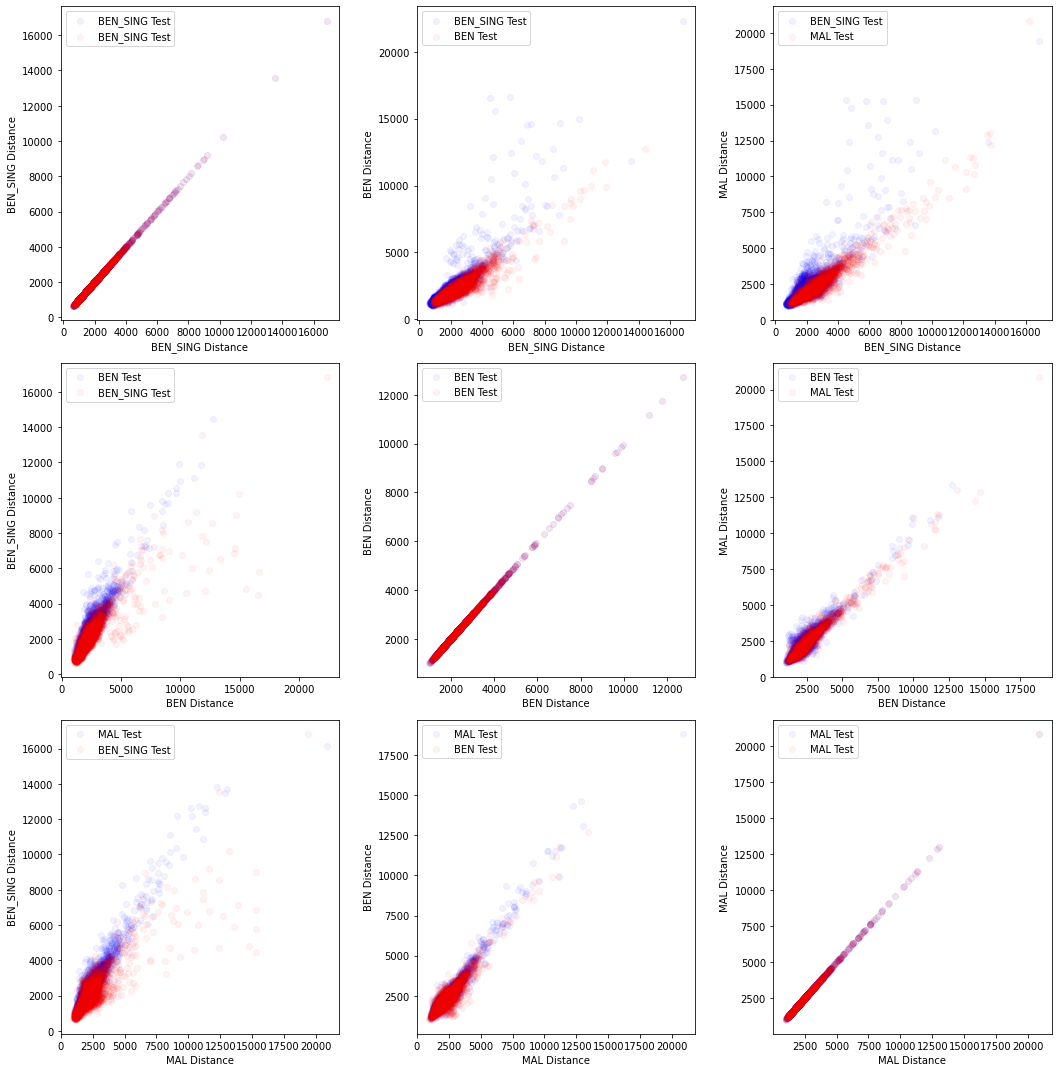

In [163]:
BEN_SING = train_csv[train_csv['Truth'] == 0]
BEN = train_csv[train_csv['Truth'] == 1]
MAL = train_csv[train_csv['Truth'] == 2]

frames = [BEN_SING, BEN, MAL]
titles = ['BEN_SING', 'BEN', 'MAL']

# Create a figure and axes for the plots
fig, axs = plt.subplots(nrows=len(titles), ncols=len(titles), figsize=(15, 15))

# Iterate over each combination of frames
for i, frame1 in enumerate(frames):
    for j, frame2 in enumerate(frames):
        # Create scatter plot for the combination of frame1 and frame2
        axs[i, j].scatter(frame1[titles[i]], frame1[titles[j]], alpha=0.05, c='blue', label=titles[i] + ' Test')
        axs[i, j].scatter(frame2[titles[i]], frame2[titles[j]], alpha=0.05, c='red', label=titles[j] + ' Test')
        axs[i, j].set_xlabel(titles[i] + ' Distance')
        axs[i, j].set_ylabel(titles[j] + ' Distance')
        axs[i, j].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [67]:
benign_val = train_csv[train_csv[0] == 0]
mal_val = train_csv[train_csv[0] == 1]

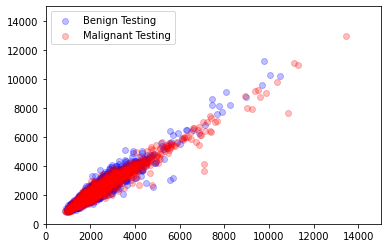

In [70]:
plt.scatter(benign_val[1], benign_val[2], alpha = .25, c = 'blue', label = 'Benign Testing')
plt.scatter(mal_val[1], mal_val[2], alpha = .25, c = 'red', label = 'Malignant Testing')
plt.xlim(0, 1.5e4)
plt.ylim(0, 1.5e4)
plt.legend()

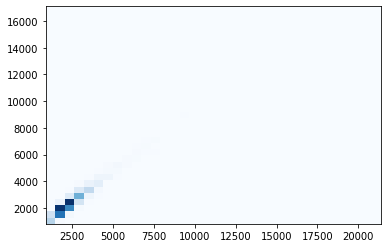

In [440]:
plt.hist2d(mal_val[1], mal_val[2], bins = 35, cmap='Blues')
plt.show()